In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
import math
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv(r"taxi_17.csv")

In [3]:
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
df.head(5)

,Unnamed: 0,start_time,end_time,trip_seconds,trip_miles,start_census,end_census,start_community,end_community,fare,tips,tolls,extras,trip_total,payment_type,company,start_latitude,start_longitude,Pickup Centroid Location,end_latitude,end_longitude,Dropoff Centroid Location,new_TaxiID,dur_min,date,weekday,avg_temp,precip,hour,day,month
0,0,2017-01-01 00:00:00,2017-01-01 00:30:00,1800.0,0.0,1.703108e+10,1.703108e+10,8,8,13.25,4.25,0.0,1.0,18.50,Credit Card,Taxi Affiliation Services,41.893216,-87.637844,POINT (-87.6378442095 41.8932163595),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),2751,30.0,2017-01-01 00:00:00,6,-0.6,0.0,0,1,1
1,1,2017-01-01 00:00:00,2017-01-01 00:00:00,660.0,2.7,NaN,NaN,2,3,10.00,2.00,0.0,0.0,12.00,Credit Card,Choice Taxi Association,42.001571,-87.695013,POINT (-87.6950125892 42.001571027),41.965812,-87.655879,POINT (-87.6558787862 41.96581197),5058,11.0,2017-01-01 00:00:00,6,-0.6,0.0,0,1,1
2,2,2017-01-01 00:00:00,2017-01-01 00:15:00,120.0,0.5,NaN,NaN,16,16,4.50,0.00,0.0,0.0,4.50,Cash,Taxi Affiliation Services,41.953582,-87.723452,POINT (-87.7234523905 41.9535821253),41.953582,-87.723452,POINT (-87.7234523905 41.9535821253),5047,2.0,2017-01-01 00:00:00,6,-0.6,0.0,0,1,1
3,3,2017-01-01 00:00:00,2017-01-01 00:00:00,240.0,1.3,1.703184e+10,1.703183e+10,32,28,6.25,0.00,0.0,0.0,6.25,Cash,Taxi Affiliation Services,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),2416,4.0,2017-01-01 00:00:00,6,-0.6,0.0,0,1,1
4,4,2017-01-01 00:00:00,2017-01-01 00:00:00,420.0,0.0,1.703128e+10,1.703184e+10,28,32,6.00,0.00,0.0,0.0,6.00,Cash,Blue Ribbon Taxi Association Inc.,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),3952,7.0,2017-01-01 00:00:00,6,-0.6,0.0,0,1,1


In [5]:
df['xh']=np.sin(2.*np.pi*df.hour/24.)
df['yh']=np.cos(2.*np.pi*df.hour/24.)

In [6]:
df['xm']=np.sin(2.*np.pi*df.month/12.)
df['ym']=np.cos(2.*np.pi*df.month/12.)

In [7]:
df['xw']=np.sin(2.*np.pi*df.weekday/7.)
df['yw']=np.cos(2.*np.pi*df.weekday/7.)

In [8]:
df['xd']=np.sin(2.*np.pi*df.day/30.)
df['yd']=np.cos(2.*np.pi*df.day/30.)

In [9]:
df.head(5)

,Unnamed: 0,start_time,end_time,trip_seconds,trip_miles,start_census,end_census,start_community,end_community,fare,tips,tolls,extras,trip_total,payment_type,company,start_latitude,start_longitude,Pickup Centroid Location,end_latitude,end_longitude,Dropoff Centroid Location,new_TaxiID,dur_min,date,weekday,avg_temp,precip,hour,day,month,xh,yh,xm,ym,xw,yw,xd,yd
0,0,2017-01-01 00:00:00,2017-01-01 00:30:00,1800.0,0.0,1.703108e+10,1.703108e+10,8,8,13.25,4.25,0.0,1.0,18.50,Credit Card,Taxi Affiliation Services,41.893216,-87.637844,POINT (-87.6378442095 41.8932163595),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),2751,30.0,2017-01-01 00:00:00,6,-0.6,0.0,0,1,1,0.0,1.0,0.5,0.866025,-0.781831,0.62349,0.207912,0.978148
1,1,2017-01-01 00:00:00,2017-01-01 00:00:00,660.0,2.7,NaN,NaN,2,3,10.00,2.00,0.0,0.0,12.00,Credit Card,Choice Taxi Association,42.001571,-87.695013,POINT (-87.6950125892 42.001571027),41.965812,-87.655879,POINT (-87.6558787862 41.96581197),5058,11.0,2017-01-01 00:00:00,6,-0.6,0.0,0,1,1,0.0,1.0,0.5,0.866025,-0.781831,0.62349,0.207912,0.978148
2,2,2017-01-01 00:00:00,2017-01-01 00:15:00,120.0,0.5,NaN,NaN,16,16,4.50,0.00,0.0,0.0,4.50,Cash,Taxi Affiliation Services,41.953582,-87.723452,POINT (-87.7234523905 41.9535821253),41.953582,-87.723452,POINT (-87.7234523905 41.9535821253),5047,2.0,2017-01-01 00:00:00,6,-0.6,0.0,0,1,1,0.0,1.0,0.5,0.866025,-0.781831,0.62349,0.207912,0.978148
3,3,2017-01-01 00:00:00,2017-01-01 00:00:00,240.0,1.3,1.703184e+10,1.703183e+10,32,28,6.25,0.00,0.0,0.0,6.25,Cash,Taxi Affiliation Services,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),2416,4.0,2017-01-01 00:00:00,6,-0.6,0.0,0,1,1,0.0,1.0,0.5,0.866025,-0.781831,0.62349,0.207912,0.978148
4,4,2017-01-01 00:00:00,2017-01-01 00:00:00,420.0,0.0,1.703128e+10,1.703184e+10,28,32,6.00,0.00,0.0,0.0,6.00,Cash,Blue Ribbon Taxi Association Inc.,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),3952,7.0,2017-01-01 00:00:00,6,-0.6,0.0,0,1,1,0.0,1.0,0.5,0.866025,-0.781831,0.62349,0.207912,0.978148


In [10]:
work_data = df.loc[:, ("trip_seconds","trip_miles","fare","tips",
                "tolls","extras","start_latitude"
                ,"end_latitude","start_longitude",
                "end_longitude","dur_min","avg_temp","precip",
                       "trip_total","xh","yh" ,"xm" ,"ym" ,"xw" ,
                       "yw","weekday","hour","month","day","xd","yd")]
work_data

,trip_seconds,trip_miles,fare,tips,tolls,extras,start_latitude,end_latitude,start_longitude,end_longitude,dur_min,avg_temp,precip,trip_total,xh,yh,xm,ym,xw,yw,weekday,hour,month,day,xd,yd
0,1800.0,0.00,13.25,4.25,0.0,1.0,41.893216,41.892508,-87.637844,-87.626215,30.00,-0.6,0.0,18.50,0.000000,1.000000,5.000000e-01,0.866025,-0.781831,0.62349,6,0,1,1,0.207912,0.978148
1,660.0,2.70,10.00,2.00,0.0,0.0,42.001571,41.965812,-87.695013,-87.655879,11.00,-0.6,0.0,12.00,0.000000,1.000000,5.000000e-01,0.866025,-0.781831,0.62349,6,0,1,1,0.207912,0.978148
2,120.0,0.50,4.50,0.00,0.0,0.0,41.953582,41.953582,-87.723452,-87.723452,2.00,-0.6,0.0,4.50,0.000000,1.000000,5.000000e-01,0.866025,-0.781831,0.62349,6,0,1,1,0.207912,0.978148
3,240.0,1.30,6.25,0.00,0.0,0.0,41.880994,41.885281,-87.632746,-87.657233,4.00,-0.6,0.0,6.25,0.000000,1.000000,5.000000e-01,0.866025,-0.781831,0.62349,6,0,1,1,0.207912,0.978148
4,420.0,0.00,6.00,0.00,0.0,0.0,41.879255,41.880994,-87.642649,-87.632746,7.00,-0.6,0.0,6.00,0.000000,1.000000,5.000000e-01,0.866025,-0.781831,0.62349,6,0,1,1,0.207912,0.978148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737161,961.0,4.00,13.75,0.00,0.0,0.0,41.944227,41.899602,-87.655998,-87.633308,16.02,-12.8,0.0,13.75,-0.258819,0.965926,-2.449294e-16,1.000000,-0.781831,0.62349,6,23,12,31,0.207912,0.978148
21737162,644.0,1.01,7.25,0.00,0.0,1.0,41.891972,41.898332,-87.612945,-87.620763,10.73,-12.8,0.0,8.25,-0.258819,0.965926,-2.449294e-16,1.000000,-0.781831,0.62349,6,23,12,31,0.207912,0.978148
21737163,381.0,1.52,7.25,0.00,0.0,1.5,41.906026,41.904935,-87.675312,-87.649907,6.35,-12.8,0.0,8.75,-0.258819,0.965926,-2.449294e-16,1.000000,-0.781831,0.62349,6,23,12,31,0.207912,0.978148
21737164,1116.0,5.50,17.25,3.85,0.0,1.5,41.899602,41.944227,-87.633308,-87.655998,18.60,-12.8,0.0,23.10,-0.258819,0.965926,-2.449294e-16,1.000000,-0.781831,0.62349,6,23,12,31,0.207912,0.978148


In [11]:
work_data = work_data.fillna(work_data.mean())

In [12]:
def plot_kmeans(k, X, outlier = True, label=True, ax=None):
    # Plot the Gaussian Mixture Model
    if outlier:
        X = X[(np.abs(stats.zscore(X)) < 3).all(axis=1)]
    
    centers , km = kmeans(k, X)
    X2 = normalize(X)
    labels = km.predict(X2)
    
    X2["labels"] = labels
    X["labels"] = labels
    X = X.sample(3000)
    unique, counts = np.unique(labels, return_counts=True)
    print(dict(zip(unique, counts)))
    print(centers)
    X = X.to_numpy()
    
    if label:
        scatter = plt.scatter(x=X[:, 0], y=X[:, 1], c=X[:, -1], s=40, cmap='viridis', zorder=2)
        plt.xlabel(X2.columns[0])
        plt.ylabel(X2.columns[1])
    else:
        plt.scatter(x=X[:, 0], y=X[:, 1], s=40, zorder=2,label=X[:, -1])
        plt.xlabel(X2.columns[0])
        plt.ylabel(X2.columns[1])
    
    plt.legend(*scatter.legend_elements()) 
    plt.show()
    plt.close()
    #plt.axis('equal')
    #not used anymore!
    #w_factor = 0.2 / gmm.weights_.max()
    #for pos, covar, w in zip(gmm.means_[:,:2], gmm.covariances_[1], gmm.weights_):
    #abc=1
    #raw_ellipse(pos, covar, alpha=w * w_factor)
    return centers, X2, X

In [13]:
def kmeans(k,unnormalized_X):
    X = normalize(unnormalized_X)
    km = KMeans(n_clusters=k, n_init=10).fit(X)
    cluster_center = pd.DataFrame(km.cluster_centers_, columns = list(X.columns.values))
    reverted_cluster_center = revert(unnormalized_X, cluster_center)
    return reverted_cluster_center, km

In [14]:
def normalize(X):
    normalized_X=(X-X.min())/(X.max()-X.min())
    return normalized_X

In [15]:
def revert(unnormalized_X,X):
    reverted_X = X * (unnormalized_X.max()-unnormalized_X.min()) + unnormalized_X.min()
    return reverted_X

In [16]:
def GMF(k,unnormalized_X):
    X = normalize(unnormalized_X)
    gmm = GaussianMixture(n_components=k).fit(X)
    cluster_center = pd.DataFrame(gmm.means_, columns = list(X.columns.values))
    reverted_cluster_center = revert(unnormalized_X, cluster_center)
    return reverted_cluster_center, gmm

In [17]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(k, X, outlier = True, label=True, ax=None):
    # Plot the Gaussian Mixture Model
    if outlier:
        X = X[(np.abs(stats.zscore(X)) < 3).all(axis=1)]
    centers , gmm = GMF(k, X)
    X2 = normalize(X)
    labels = gmm.predict(X2)
    X2["labels"] = labels
    X["labels"] = labels
    X = X.sample(3000)
    unique, counts = np.unique(labels, return_counts=True)
    print(dict(zip(unique, counts)))
    print(centers)
    X = X.to_numpy()
    
    if label:
        scatter = plt.scatter(x=X[:, 0], y=X[:, 1], c=X[:, -1], s=40, cmap='viridis', zorder=2)
        plt.xlabel(X2.columns[0])
        plt.ylabel(X2.columns[1])
    else:
        plt.scatter(x=X[:, 0], y=X[:, 1], s=40, zorder=2,label=X[:, -1])
        plt.xlabel(X2.columns[0])
        plt.ylabel(X2.columns[1])
    
    plt.legend(*scatter.legend_elements()) 
    plt.show()
    plt.close()
    #plt.axis('equal')
    #not used anymore!
    #w_factor = 0.2 / gmm.weights_.max()
    #for pos, covar, w in zip(gmm.means_[:,:2], gmm.covariances_[1], gmm.weights_):
        #abc=1
        #raw_ellipse(pos, covar, alpha=w * w_factor)
    return centers, X2, X

In [18]:
def plot_with_X_labels_index(X_plot, X_label, index1, index2):
    scatter = plt.scatter(x=X_plot[:, index1], y=X_plot[:, index2], c=X_plot[:, -1], s=40, cmap='viridis', zorder=2)
    plt.xlabel(X_label.columns[index1])
    plt.ylabel(X_label.columns[index2])

    
    plt.legend(*scatter.legend_elements()) 

("trip_seconds","trip_miles","fare","tips",
                "tolls","extras","start_latitude"
                ,"end_latitude","start_longitude",
                "end_longitude","dur_min","avg_temp","precip","Trip Total")

mehr trinkgeld wenn regen
kürzere strecken wenn regen
mehr wenn es regnet

In [19]:
df1 = work_data[work_data['precip'] == 1]
df2 = work_data[work_data['precip'] == 0]
#print(df1.mean()-df2.mean(), df1.mean(), df2.mean())

{0: 15769069, 1: 3482524}
        fare      tips    extras
0   7.899925  0.819359  0.340939
1  27.458616  2.882499  1.777698


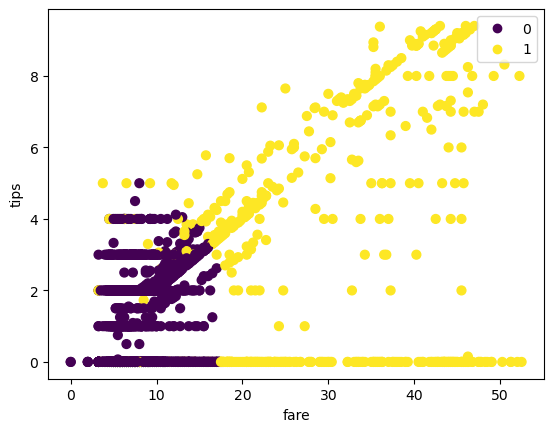

        fare      tips    extras
0   7.899925  0.819359  0.340939
1  27.458616  2.882499  1.777698

{0: 2326276, 1: 6433457, 2: 10491860}
        fare      tips    extras
0  33.027126  3.906919  2.366620
1   8.554930  2.197430  0.333133
2   8.655997  0.000013  0.390191


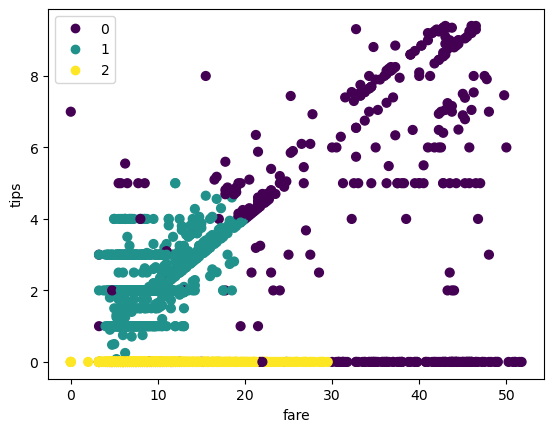

        fare      tips    extras
0  33.027126  3.906919  2.366620
1   8.554930  2.197430  0.333133
2   8.655997  0.000013  0.390191



In [20]:
sub_data = work_data.loc[:,("fare","tips","extras")]
sub_data_sample = sub_data.sample(20000000)
for i in range(2,4):
    centers,X2,X  = plot_gmm(i, sub_data_sample)
    print(centers)
    print()

{0: 86710, 1: 8787}
   trip_miles       fare      tips
0    1.655015   8.748748  0.864449
1   12.881531  35.495621  4.217141


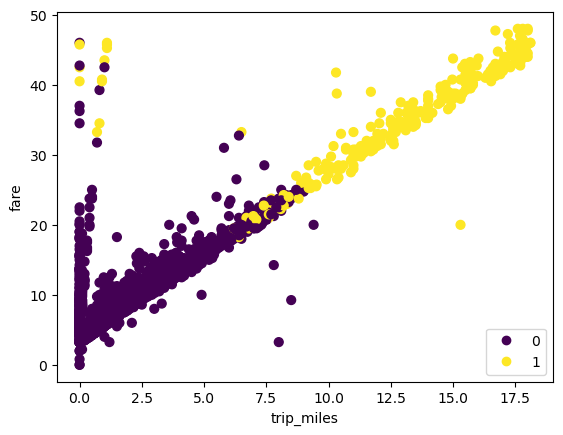

   trip_miles       fare      tips
0    1.655015   8.748748  0.864449
1   12.881531  35.495621  4.217141

{0: 28668, 1: 58862, 2: 7967}
   trip_miles       fare      tips
0    1.869370   9.464787  2.561737
1    1.607999   8.609532  0.087809
2   13.601815  36.673787  4.189724


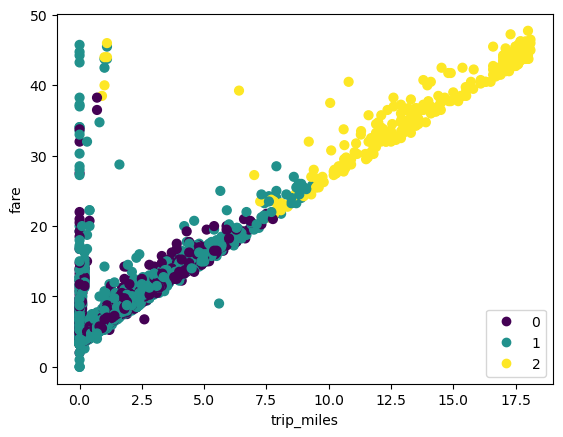

   trip_miles       fare      tips
0    1.869370   9.464787  2.561737
1    1.607999   8.609532  0.087809
2   13.601815  36.673787  4.189724



In [167]:
sub_data = work_data.loc[:,("trip_miles","fare","tips")]
sub_data_sample = sub_data.sample(100000)
for i in range(2,4):
    centers,X2,X = plot_kmeans(i, sub_data_sample)
    print(centers)
    print()

{0: 72661, 1: 25198}
   trip_miles       fare      tips
0    1.421017   7.552610  0.807583
1    7.420905  24.518242  3.029062


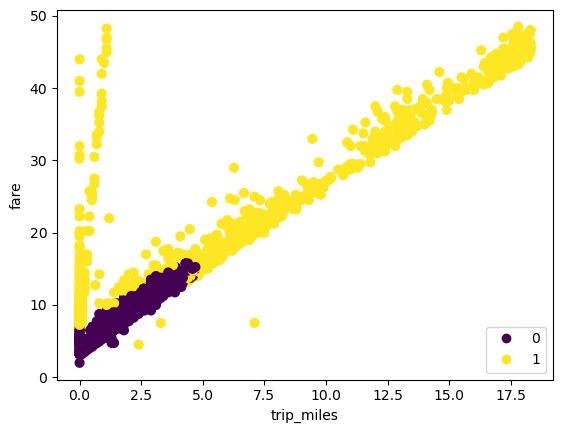

   trip_miles       fare      tips
0    1.421017   7.552610  0.807583
1    7.420905  24.518242  3.029062

{0: 65545, 1: 24594, 2: 7720}
   trip_miles      fare      tips
0    1.290342   7.13963  0.762780
1    8.289970  23.87962  2.993438
2    0.797328  14.08089  1.476237


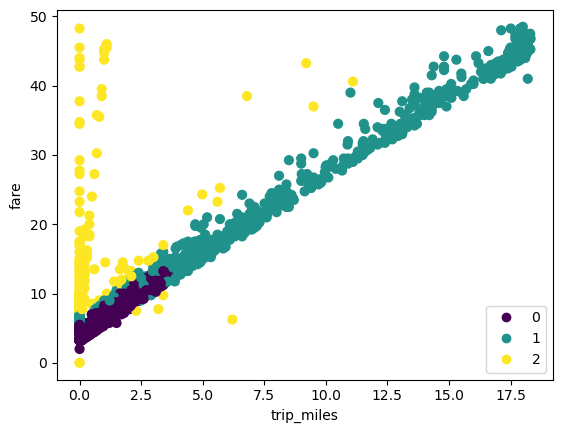

   trip_miles      fare      tips
0    1.290342   7.13963  0.762780
1    8.289970  23.87962  2.993438
2    0.797328  14.08089  1.476237



In [168]:
sub_data = work_data.loc[:,("trip_miles","fare","tips")]
sub_data_sample = sub_data.sample(100000)
for i in range(2,4):
    centers,X2,X  = plot_gmm(i, sub_data_sample)
    print(centers)
    print()

In [ ]:
("trip_seconds","trip_miles","fare","tips",
                "tolls","extras","start_latitude"
                ,"end_latitude","start_longitude",
                "end_longitude","dur_min","avg_temp","precip","trip_total")

{0: 13706, 1: 3786}
   start_longitude  start_latitude  end_latitude  end_longitude  trip_total  \
0       -87.631638       41.887024     41.886716     -87.632890    9.313613   
1       -87.658247       41.924689     41.937911     -87.669974   16.025898   

   trip_miles  
0    1.347109  
1    3.836684  


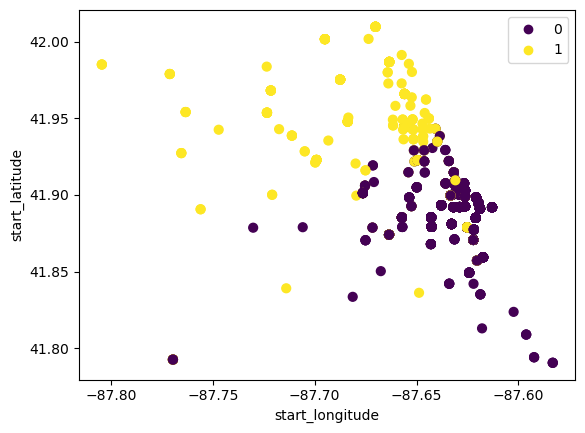

   start_longitude  start_latitude  end_latitude  end_longitude  trip_total  \
0       -87.631638       41.887024     41.886716     -87.632890    9.313613   
1       -87.658247       41.924689     41.937911     -87.669974   16.025898   

   trip_miles  
0    1.347109  
1    3.836684  



In [169]:
sub_data = work_data.loc[:,("start_longitude","start_latitude","end_latitude","end_longitude","trip_total","trip_miles")]
sub_data_sample = sub_data.sample(20000)
for i in range(2,3):
    centers,X2,X  = plot_kmeans(i, sub_data_sample)
    print(centers)
    print()

{0: 17505, 1: 1550}
        fare      tips    extras
0   9.214355  0.878599  0.378678
1  36.326290  4.525174  2.992903


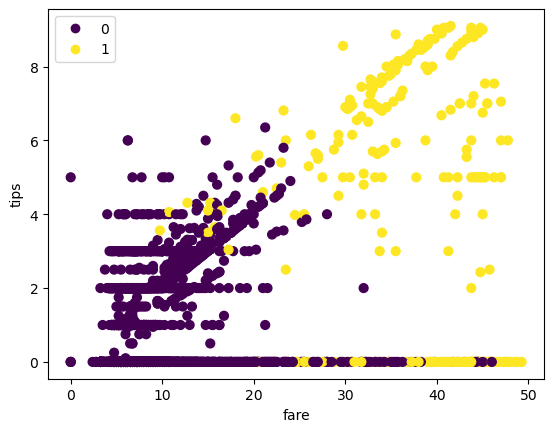


{0: 11896, 1: 1384, 2: 5775}
        fare      tips    extras
0   9.163729  0.091433  0.385855
1  37.429242  4.506671  3.268231
2   9.828741  2.608584  0.372554


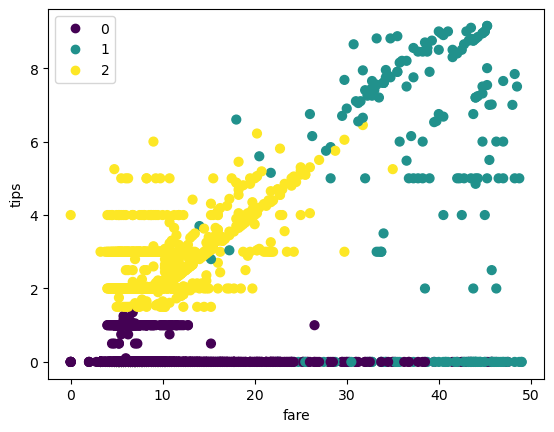

In [170]:
sub_data = work_data.loc[:,("fare","tips","extras")]
sub_data_sample = sub_data.sample(20000)
for i in range(2,4):
    centers,X2,X = plot_kmeans(i, sub_data_sample)
    print()

{0: 11551, 1: 6319}
   start_longitude  start_latitude  end_latitude  end_longitude  trip_total  \
0       -87.629535       41.887932     41.888566     -87.631098    8.377907   
1       -87.656179       41.903410     41.910797     -87.660911   16.845574   

   trip_miles  
0    1.080327  
1    3.897909  


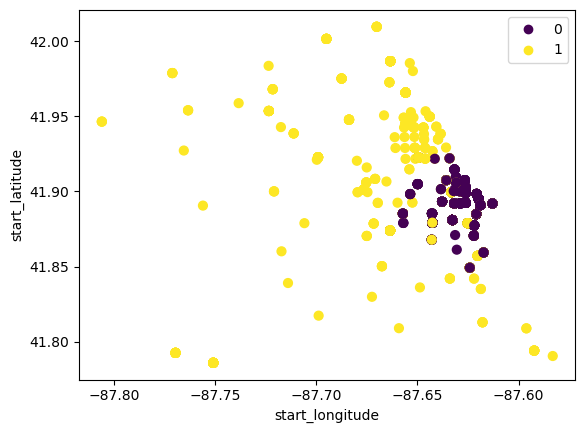

In [220]:
sub_data = work_data.loc[:,("start_longitude","start_latitude","end_latitude","end_longitude","trip_total","trip_miles")]
sub_data_sample = sub_data.sample(20000)
for i in range(2,3):
    centers,X2,X  = plot_gmm(i, sub_data_sample)
    print()

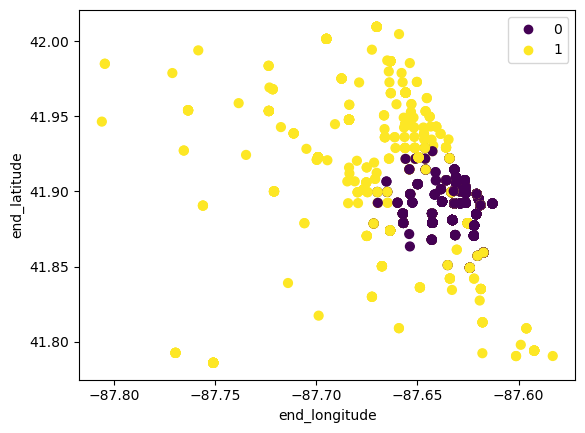

In [221]:
plot_with_X_labels_index(X,X2,3,2)

In [196]:
("trip_seconds","trip_miles","fare","tips",
                "tolls","extras","start_latitude"
                ,"end_latitude","start_longitude",
                "end_longitude","dur_min","avg_temp","precip","trip_total")

('trip_seconds',
 'trip_miles',
 'fare',
 'tips',
 'tolls',
 'extras',
 'start_latitude',
 'end_latitude',
 'start_longitude',
 'end_longitude',
 'dur_min',
 'avg_temp',
 'precip',
 'trip_total')

{0: 9403, 1: 10305}
     dur_min   avg_temp
0  11.295438   2.373351
1  13.426663  20.847256


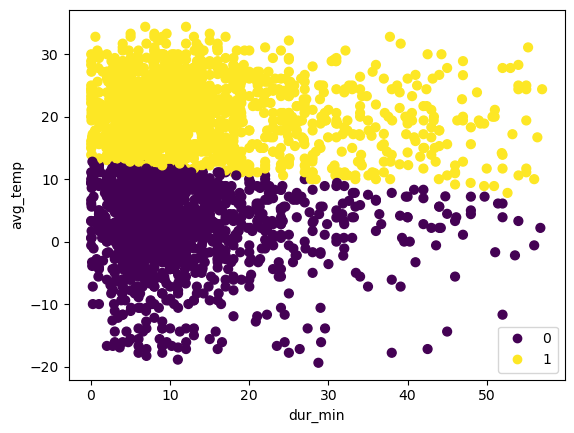


{0: 8348, 1: 8967, 2: 2393}
     dur_min   avg_temp
0   9.223960   1.999877
1   9.320933  20.900485
2  35.100176  13.717987


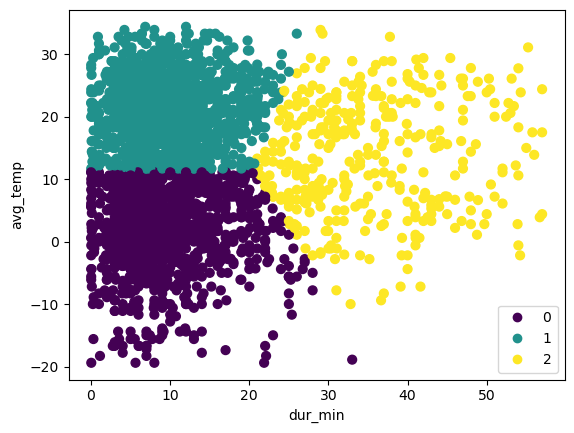

In [222]:
sub_data = work_data.loc[:,("dur_min","avg_temp")]
sub_data_sample = sub_data.sample(20000)
for i in range(2,4):
    centers,X2,X  = plot_kmeans(i, sub_data_sample)
    print()

{0: 15395, 1: 4298}
     dur_min  avg_temp
0   7.959546  11.82582
1  24.158129  12.91005


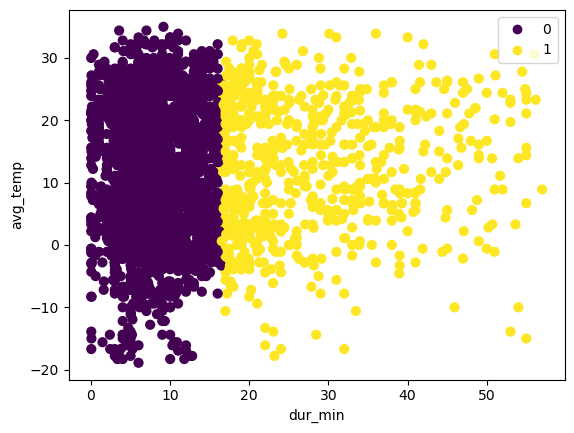


{0: 7260, 1: 3688, 2: 8745}
     dur_min   avg_temp
0   9.004898  22.211874
1  27.306059  10.806200
2   7.911851   4.604484


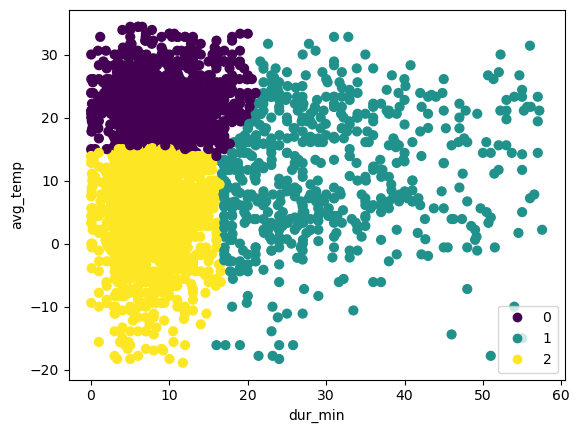

In [223]:
sub_data = work_data.loc[:,("dur_min","avg_temp")]
sub_data_sample = sub_data.sample(20000)
for i in range(2,4):
    centers,X2,X  = plot_gmm(i, sub_data_sample)
    print()

{0: 226611, 1: 213611}
   trip_total  trip_miles  start_latitude  end_latitude  start_longitude  \
0   11.442483    2.108697       41.895097     41.896794       -87.637183   
1   10.347633    1.780024       41.895092     41.896380       -87.637426   

   end_longitude    dur_min   avg_temp  
0     -87.642458  10.729165  21.073328  
1     -87.641272   9.473466   2.493850  


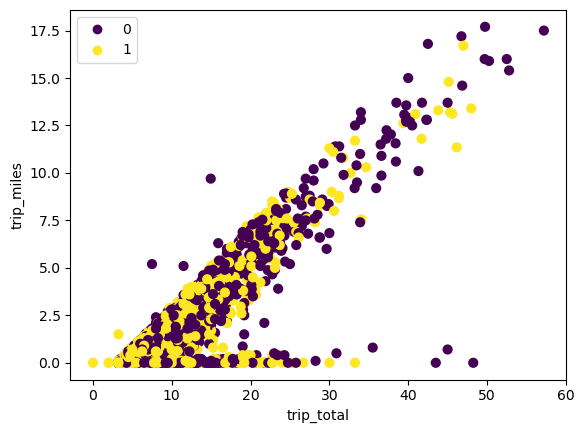


{0: 177164, 1: 72570, 2: 190488}
   trip_total  trip_miles  start_latitude  end_latitude  start_longitude  \
0    9.056335    1.302267       41.890327     41.890431       -87.633496   
1   19.565119    5.096618       41.920845     41.929174       -87.659160   
2    9.334077    1.349882       41.889702     41.889892       -87.632499   

   end_longitude    dur_min   avg_temp  
0     -87.635042   8.351381   2.045642  
1     -87.678420  18.029011  12.868910  
2     -87.634302   8.746490  21.056948  


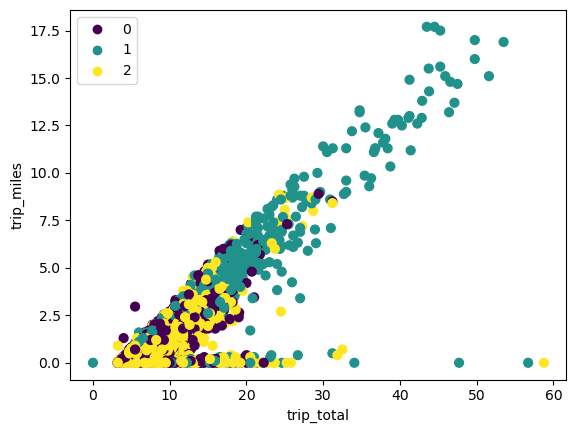

In [226]:
sub_data = work_data.loc[:,("trip_total","trip_miles","start_latitude"
                ,"end_latitude","start_longitude",
                "end_longitude","dur_min","avg_temp")]
sub_data_sample = sub_data.sample(500000)
for i in range(2,4):
    centers,X2,X  = plot_kmeans(i, sub_data_sample)
    print()

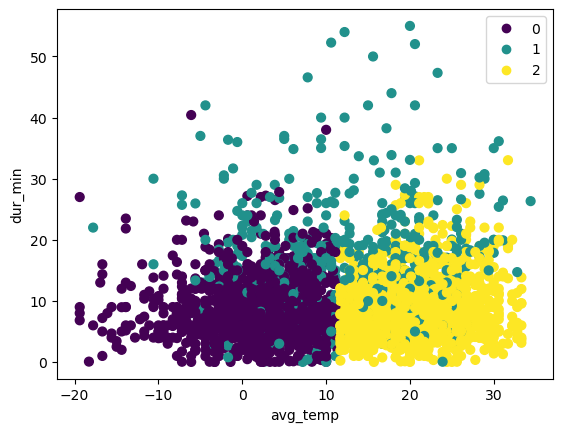

In [227]:
plot_with_X_labels_index(X, X2, 7,6)

{0: 277729, 1: 163152}
   trip_total  trip_miles  start_latitude  end_latitude  start_longitude  \
0    8.223958    1.052420       41.887798     41.888201       -87.629656   
1   15.676218    3.539681       41.907321     41.910625       -87.650242   

   end_longitude    dur_min   avg_temp  
0     -87.630933   7.638359  11.808177  
1     -87.660337  14.476297  12.449543  


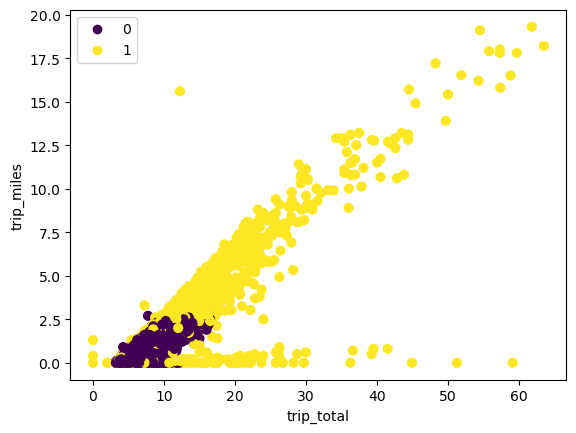


{0: 65312, 1: 137497, 2: 238072}
   trip_total  trip_miles  start_latitude  end_latitude  start_longitude  \
0   19.663113    4.630474       41.906029     41.901375       -87.666294   
1   12.062281    2.385246       41.901900     41.907644       -87.634954   
2    7.795950    0.948503       41.887665     41.888358       -87.630209   

   end_longitude    dur_min   avg_temp  
0     -87.673613  17.610597  12.297686  
1     -87.645372  11.774517  12.577185  
2     -87.630391   7.027273  11.650783  


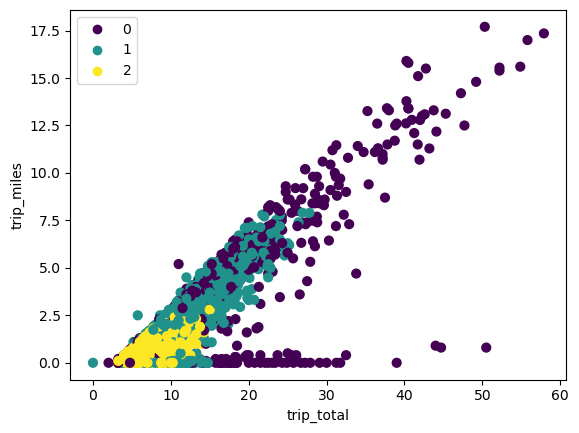

In [228]:
sub_data = work_data.loc[:,("trip_total","trip_miles","start_latitude"
                ,"end_latitude","start_longitude",
                "end_longitude","dur_min","avg_temp")]
sub_data_sample = sub_data.sample(500000)
for i in range(2,4):
    centers,X2,X  = plot_gmm(i, sub_data_sample)
    print()

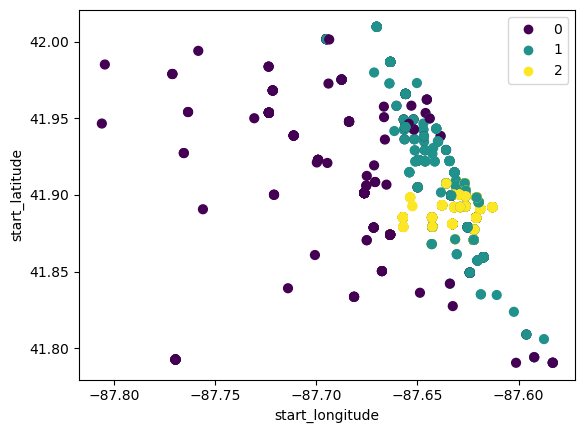

In [229]:
plot_with_X_labels_index(X,X2,4,2)

{0: 8686, 1: 8986}
   start_longitude  start_latitude  end_longitude  end_latitude   avg_temp
0       -87.637527       41.895117     -87.642157      41.89632   2.604263
1       -87.637290       41.894762     -87.641390      41.89673  21.104880


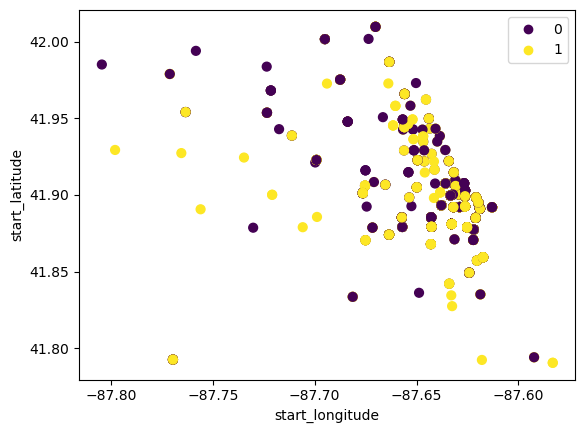

In [230]:
sub_data = work_data.loc[:,("start_longitude","start_latitude","end_longitude","end_latitude","avg_temp")]
sub_data_sample = sub_data.sample(20000)
for i in range(2,3):
    centers,X2,X  = plot_kmeans(i, sub_data_sample)
    print()

{0: 5792, 1: 11904}
   start_longitude  start_latitude  end_longitude  end_latitude   avg_temp
0       -87.653413       41.910186     -87.664159     41.914739  12.246236
1       -87.629065       41.887830     -87.630798     41.888527  11.828264


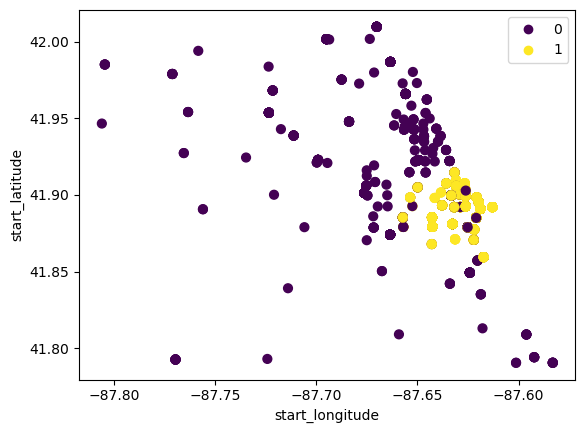

In [231]:
sub_data = work_data.loc[:,("start_longitude","start_latitude","end_longitude","end_latitude","avg_temp")]
sub_data_sample = sub_data.sample(20000)
for i in range(2,3):
    centers,X2,X = plot_gmm(i, sub_data_sample)
    print()

{0: 43032, 1: 45174}
   start_longitude  start_latitude  end_latitude  trip_total  trip_miles  \
0       -87.637289       41.894832     41.896043   10.411222    1.811460   
1       -87.637327       41.895408     41.897096   11.503724    2.134547   

   end_longitude    dur_min   avg_temp  
0     -87.640946   9.528777   2.549162  
1     -87.642672  10.764106  21.121771  


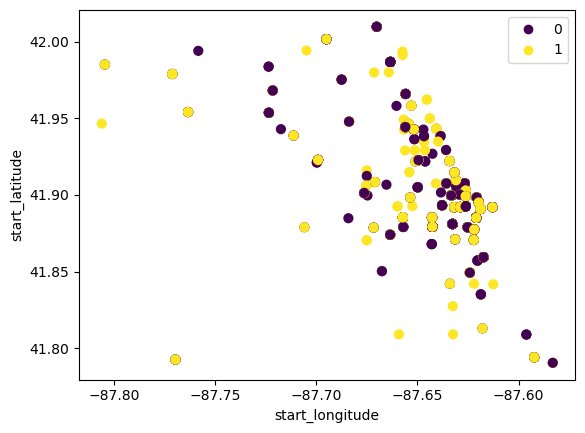


{0: 35525, 1: 37980, 2: 14701}
   start_longitude  start_latitude  end_latitude  trip_total  trip_miles  \
0       -87.633312       41.889985     41.890022    9.152327    1.343617   
1       -87.632337       41.889557     41.889662    9.380341    1.376508   
2       -87.659849       41.921985     41.930365   19.482505    5.062020   

   end_longitude    dur_min   avg_temp  
0     -87.634813   8.470954   2.026186  
1     -87.634131   8.783277  21.030211  
2     -87.678728  17.813709  13.054267  


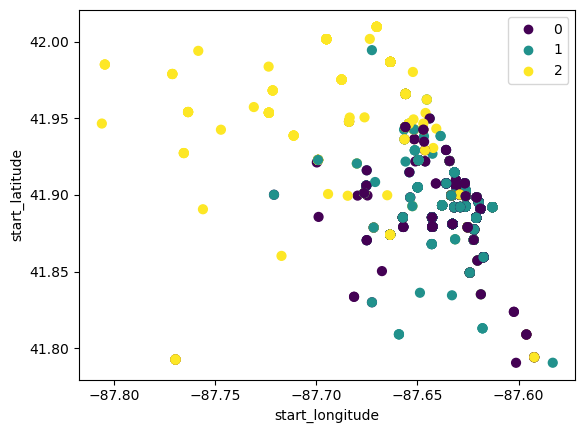

In [232]:
sub_data = work_data.loc[:,("start_longitude","start_latitude"
                ,"end_latitude","trip_total","trip_miles",
                "end_longitude","dur_min","avg_temp")]
sub_data_sample = sub_data.sample(100000)
for i in range(2,4):
    centers,X2,X  = plot_kmeans(i, sub_data_sample)
    print()

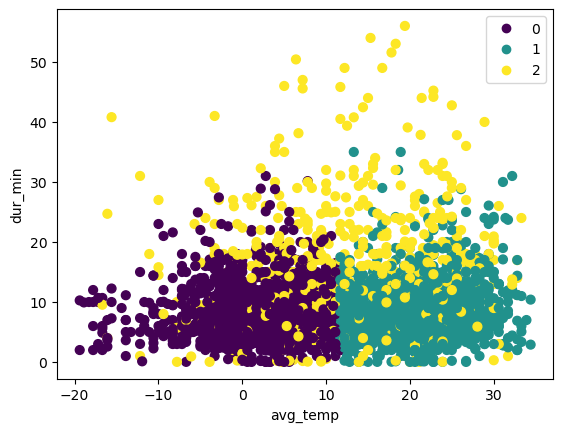

In [233]:
plot_with_X_labels_index(X,X2,7,6)

{0: 277373, 1: 162833}
   start_longitude  start_latitude  end_latitude  trip_total  trip_miles  \
0       -87.629682       41.887792     41.888176    8.218674    1.050888   
1       -87.650043       41.907421     41.910722   15.607757    3.515008   

   end_longitude    dur_min   avg_temp  
0     -87.630991   7.629243  11.825307  
1     -87.660222  14.437209  12.432898  


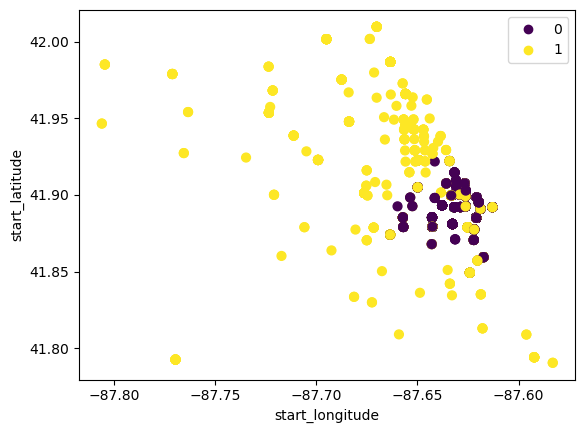


{0: 137468, 1: 237564, 2: 65174}
   start_longitude  start_latitude  end_latitude  trip_total  trip_miles  \
0       -87.634806       41.901630     41.907499   12.085205    2.386433   
1       -87.630241       41.887664     41.888326    7.793876    0.948925   
2       -87.666360       41.906852     41.901881   19.495655    4.578542   

   end_longitude    dur_min   avg_temp  
0     -87.645157  11.799317  12.637679  
1     -87.630461   7.015526  11.656550  
2     -87.674007  17.514540  12.179816  


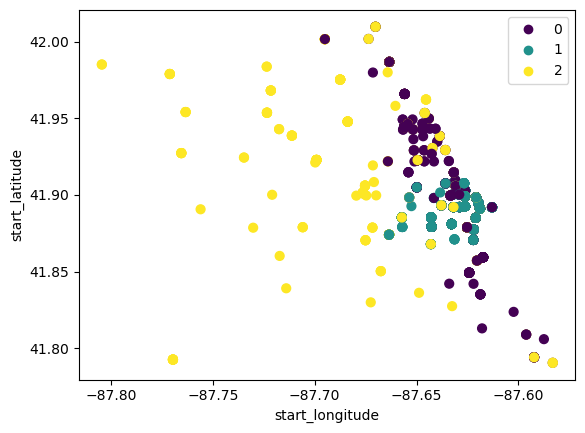

In [234]:
sub_data = work_data.loc[:,("start_longitude","start_latitude"
                ,"end_latitude","trip_total","trip_miles",
                "end_longitude","dur_min","avg_temp")]
sub_data_sample = sub_data.sample(500000)
for i in range(2,4):
    centers,X2,X  = plot_gmm(i, sub_data_sample)
    print()

In [235]:
sub_data = work_data.loc[:,("trip_total","trip_miles","fare","tips",
                "tolls","extras","dur_min","avg_temp")]
work_datacorr=sub_data.corr()
work_datacorr = work_datacorr.round(2)
print(work_datacorr)

            trip_total  trip_miles  fare  tips  tolls  extras  dur_min  \
trip_total        1.00        0.82  0.98  0.65   0.06    0.45     0.70   
trip_miles        0.82        1.00  0.81  0.54   0.01    0.34     0.66   
fare              0.98        0.81  1.00  0.52   0.05    0.33     0.70   
tips              0.65        0.54  0.52  1.00   0.00    0.28     0.43   
tolls             0.06        0.01  0.05  0.00   1.00    0.00     0.01   
extras            0.45        0.34  0.33  0.28   0.00    1.00     0.26   
dur_min           0.70        0.66  0.70  0.43   0.01    0.26     1.00   
avg_temp          0.03        0.02  0.02  0.02   0.00    0.03     0.05   

            avg_temp  
trip_total      0.03  
trip_miles      0.02  
fare            0.02  
tips            0.02  
tolls           0.00  
extras          0.03  
dur_min         0.05  
avg_temp        1.00  


and add label 
df1 = df[df["labels"]=="0"]

In [321]:
def plot_with_X_labels_index2(original_sample,X_plot, X_label, index1, index2):
    X_label = revert(X_label, X_label)
    test = X_label["labels"]
    original_sample["labels"] = test
    X_label = original_sample.copy().sample(3000)
    X_plot = X_label.to_numpy()
    scatter = plt.scatter(x=X_plot[:, index1], y=X_plot[:, index2], c=X_plot[:, -1], s=40, cmap='viridis', zorder=2)
    plt.xlabel(X_label.columns[index1])
    plt.ylabel(X_label.columns[index2])

    plt.legend(*scatter.legend_elements())

{0: 46985, 1: 51354}
        fare  trip_miles        xm        ym
0  12.204330    3.086156 -0.632760  0.143947
1  12.161186    3.061112  0.617553 -0.214652


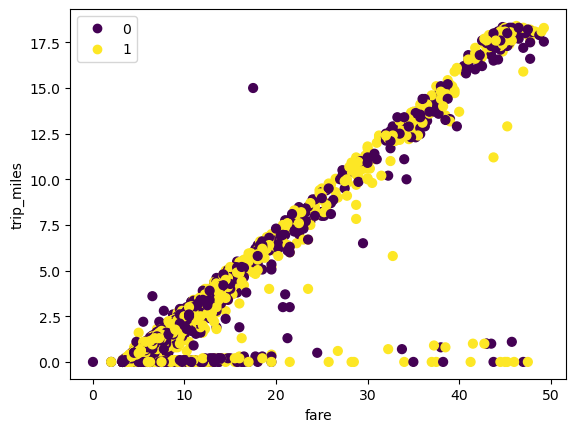

In [324]:
sub_data = work_data.loc[:,("fare","trip_miles","xm","ym","month")]
sub_data_sample1 = sub_data.sample(100000)
sub_data_sample1 = sub_data_sample1[(np.abs(stats.zscore(sub_data_sample1)) < 3).all(axis=1)]
sub_data_sample = sub_data_sample1.loc[:,("fare","trip_miles","xm","ym")]
for i in range(2,3):
    centers,X2,X  = plot_kmeans(i, sub_data_sample, outlier=False)
    print()

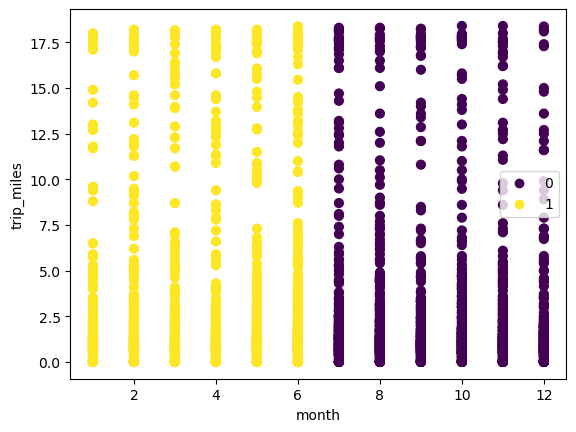

In [326]:
plot_with_X_labels_index2(sub_data_sample1, X, X2, 4,1)

{0: 50828, 1: 47144}
        fare        xm        ym  trip_miles
0  11.969662  0.615147 -0.211962    2.975381
1  12.117734 -0.632515  0.136720    3.036848


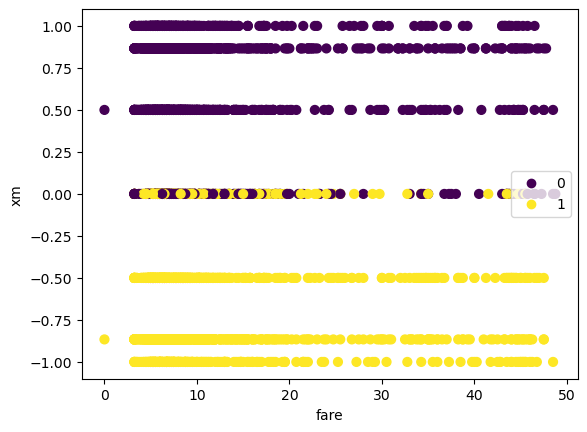


{0: 24175, 1: 50828, 2: 22969}
        fare        xm        ym  trip_miles  labels
0  12.226926 -0.783420 -0.466613    3.082911     1.0
1  11.968322  0.619351 -0.212621    2.974629     0.0
2  12.005540 -0.481023  0.772640    2.989934     1.0


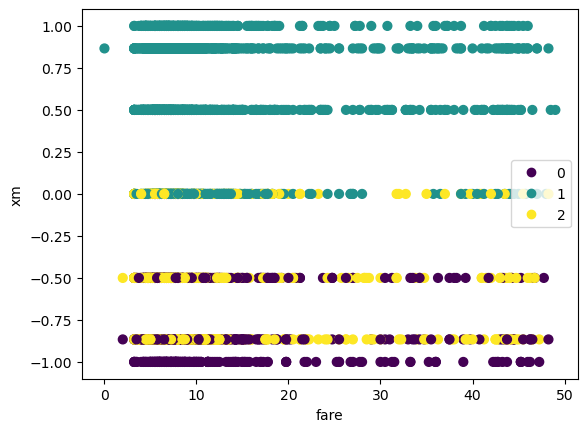

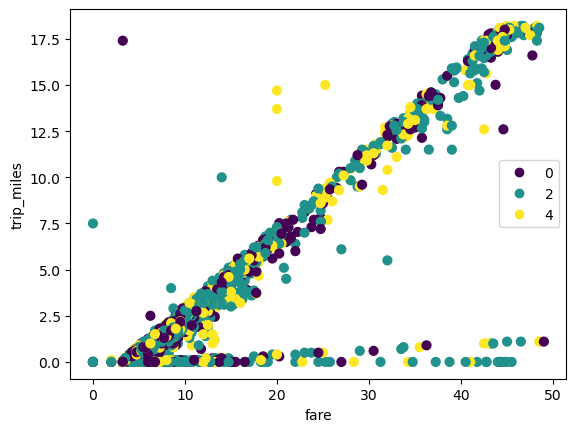

In [329]:
sub_data = work_data.loc[:,("fare","xm","ym","month","trip_miles")]
sub_data_sample1 = sub_data.sample(100000)
sub_data_sample1 = sub_data_sample1[(np.abs(stats.zscore(sub_data_sample1)) < 3).all(axis=1)]
sub_data_sample = sub_data_sample1.loc[:,("fare","xm","ym","trip_miles")]
for i in range(2,4):
    centers,X2,X  = plot_gmm(i, sub_data_sample, outlier=False)
    print()
plot_with_X_labels_index2(sub_data_sample1,X,X2,0,4)

{0: 9872, 1: 9885}
        fare        xd        yd
0  12.287914 -0.349001 -0.533304
1  12.244740  0.402033  0.506076


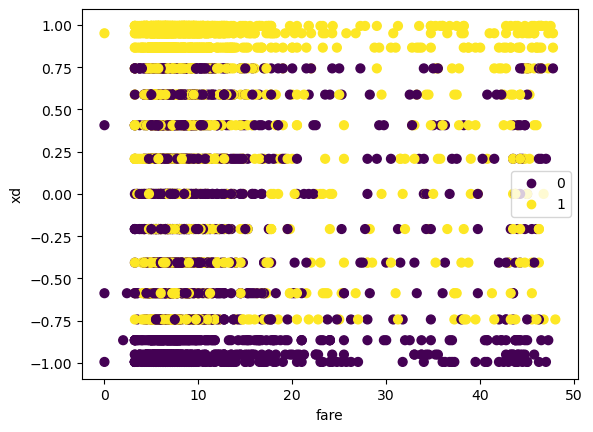


{0: 4791, 1: 9885, 2: 5081}
        fare        xd        yd        labels
0  12.218015  0.202794 -0.893349 -2.886580e-15
1  12.244740  0.402033  0.506076  1.000000e+00
2  12.353824 -0.869303 -0.193810 -2.886580e-15


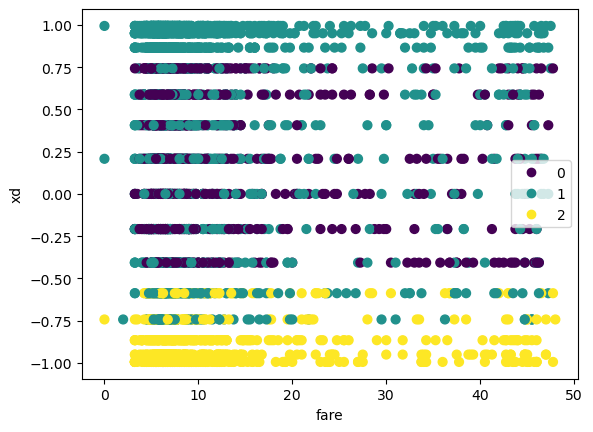

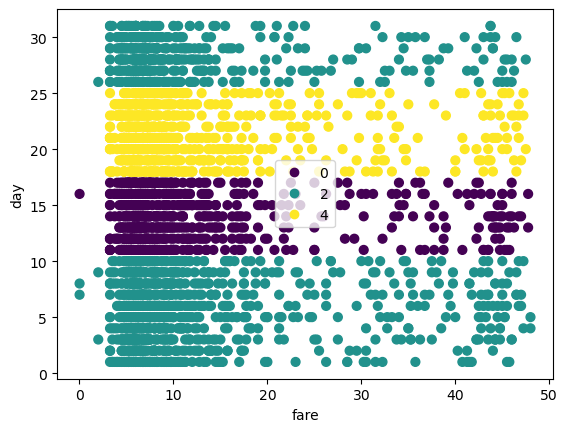

In [330]:
sub_data = work_data.loc[:,("fare","xd","yd","day")]
sub_data_sample1 = sub_data.sample(20000)
sub_data_sample1 = sub_data_sample1[(np.abs(stats.zscore(sub_data_sample1)) < 3).all(axis=1)]
sub_data_sample = sub_data_sample1.loc[:,("fare","xd","yd")]
for i in range(2,4):
    centers,X2,X  = plot_kmeans(i, sub_data_sample, outlier=False)
    print()
plot_with_X_labels_index2(sub_data_sample1,X,X2,0,3)

{0: 9924, 1: 9863}
        fare        xd        yd
0  12.490020 -0.257712 -0.579862
1  12.227665  0.287800  0.571629


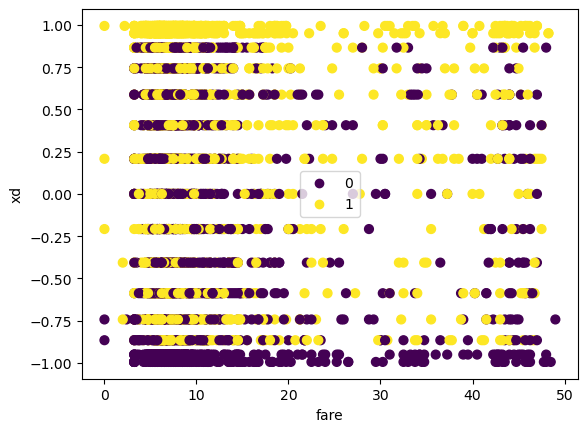


{0: 5324, 1: 9863, 2: 4600}
        fare        xd        yd  labels
0  12.621627 -0.801597 -0.380801     0.0
1  12.306031  0.285589  0.581475     1.0
2  12.169391  0.377361 -0.832760     0.0


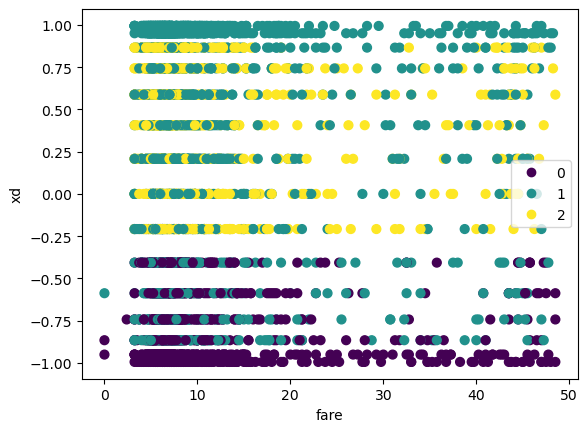

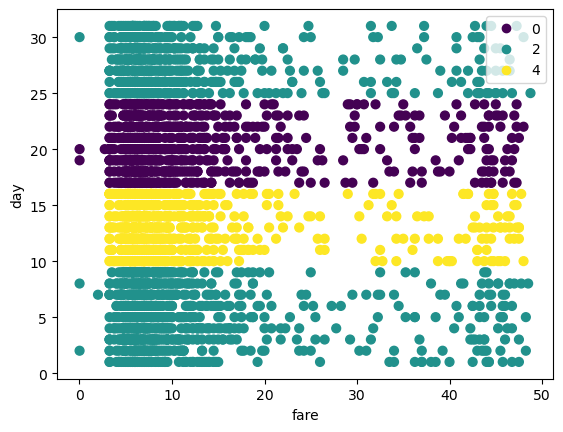

In [331]:
sub_data = work_data.loc[:,("fare","xd","yd","day")]
sub_data_sample1 = sub_data.sample(20000)
sub_data_sample1 = sub_data_sample1[(np.abs(stats.zscore(sub_data_sample1)) < 3).all(axis=1)]
sub_data_sample = sub_data_sample1.loc[:,("fare","xd","yd")]
for i in range(2,4):
    centers,X2,X  = plot_gmm(i, sub_data_sample, outlier=False)
    print()
plot_with_X_labels_index2(sub_data_sample1,X,X2,0,3)

{0: 10419, 1: 9108}
        fare        xw        yw  trip_miles
0  12.208783  0.337807  0.461280    3.062438
1  11.572275 -0.285259 -0.706105    2.788731


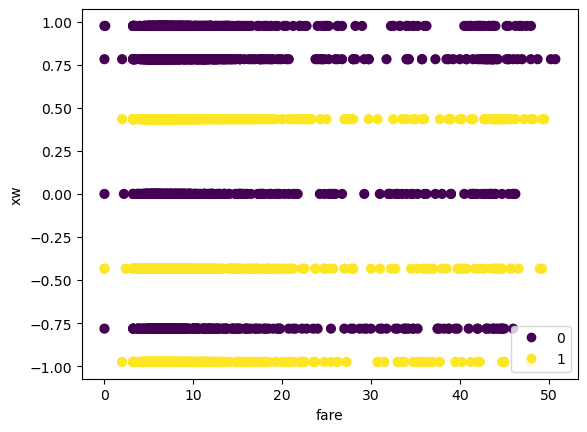


{0: 9108, 1: 5889, 2: 4530}
        fare        xw        yw  trip_miles        labels
0  11.572275 -0.285259 -0.706105    2.788731  1.000000e+00
1  11.772175  0.882167  0.183892    2.876307  4.163336e-15
2  12.776373 -0.369860  0.821885    3.304408 -1.165734e-15


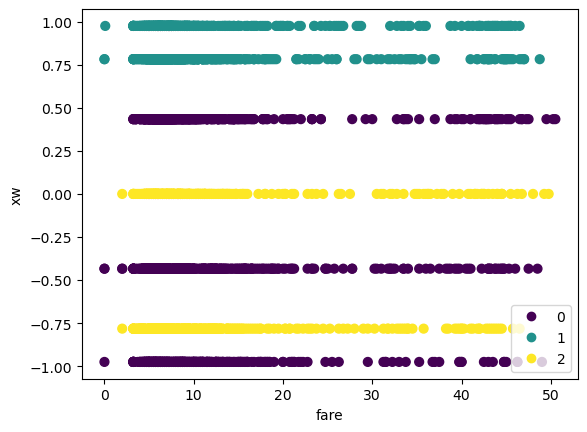

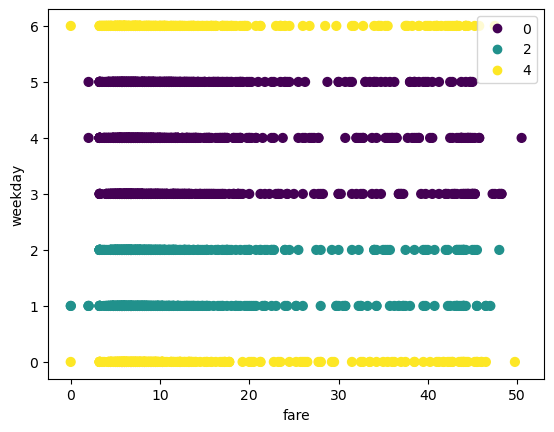

In [332]:
sub_data = work_data.loc[:,("fare","xw","yw","weekday","trip_miles")]
sub_data_sample1 = sub_data.sample(20000)
sub_data_sample1 = sub_data_sample1[(np.abs(stats.zscore(sub_data_sample1)) < 3).all(axis=1)]
sub_data_sample = sub_data_sample1.loc[:,("fare","xw","yw","trip_miles")]
for i in range(2,4):
    centers,X2,X  = plot_kmeans(i, sub_data_sample, outlier=False)
    print()
plot_with_X_labels_index2(sub_data_sample1,X,X2,0,3)

{0: 12108, 1: 7525}
        fare        xw        yw  trip_miles
0  11.878134  0.024287 -0.577759    2.905068
1  12.555581  0.063705  0.749320    3.262069


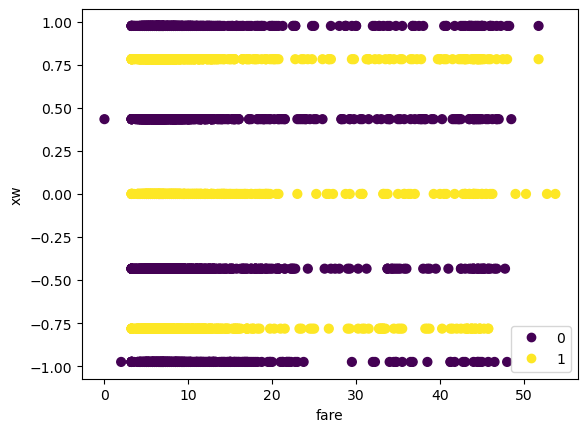


{0: 5949, 1: 7525, 2: 6159}
        fare        xw        yw  trip_miles  labels
0  11.616920 -0.678259 -0.594533    2.796936     0.0
1  12.550978  0.063793  0.749127    3.260276     1.0
2  12.134751  0.702693 -0.563893    3.011012     0.0


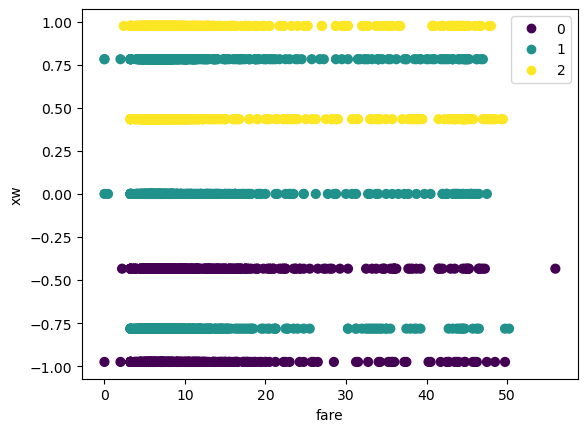

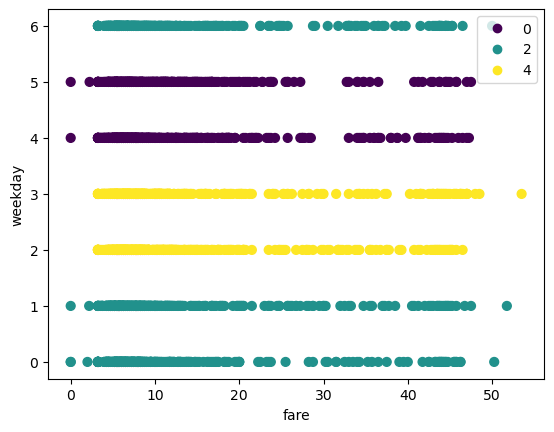

In [333]:
sub_data = work_data.loc[:,("fare","xw","yw","weekday","trip_miles")]
sub_data_sample1 = sub_data.sample(20000)
sub_data_sample1 = sub_data_sample1[(np.abs(stats.zscore(sub_data_sample1)) < 3).all(axis=1)]
sub_data_sample = sub_data_sample1.loc[:,("fare","xw","yw","trip_miles")]
for i in range(2,4):
    centers,X2,X  = plot_gmm(i, sub_data_sample, outlier=False)
    print()
plot_with_X_labels_index2(sub_data_sample1,X,X2,0,3)

{0: 84681, 1: 89897}
   trip_miles   avg_temp  start_latitude  end_latitude  start_longitude  \
0    1.829393   3.577863       41.895388     41.898008       -87.637906   
1    1.904815  20.014388       41.895021     41.897176       -87.636864   

   end_longitude    dur_min  trip_total        xh        yh        xm  \
0     -87.641242   9.669368   10.500757 -0.244381 -0.153504  0.486072   
1     -87.640345  10.228325   10.831879 -0.255519 -0.133286 -0.418173   

         ym        xw        yw        xd        yd  
0  0.420487  0.038485 -0.098639  0.035376 -0.013493  
1 -0.474790  0.033328 -0.066625  0.005328 -0.007064  


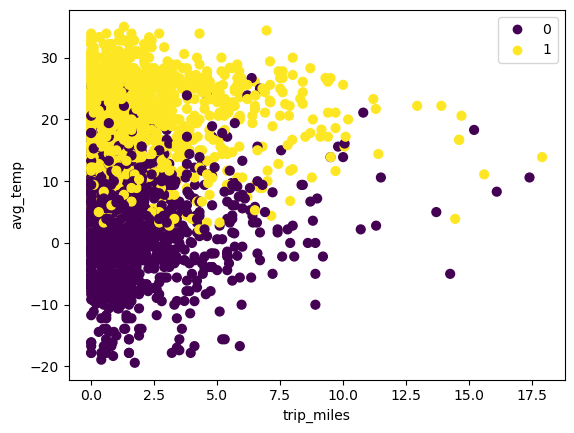


{0: 41843, 1: 84681, 2: 48054}
   trip_miles   avg_temp  start_latitude  end_latitude  start_longitude  \
0    1.911613  20.354441       41.895710     41.897825       -87.636971   
1    1.829647   3.600711       41.895388     41.898019       -87.637908   
2    1.898601  19.711202       41.894421     41.896590       -87.636767   

   end_longitude    dur_min  trip_total        xh        yh        xm  \
0     -87.640605  10.516014   10.912092 -0.287348 -0.093440 -0.433278   
1     -87.641248   9.669440   10.501365 -0.245010 -0.152831  0.486508   
2     -87.640107   9.978820   10.761631 -0.226717 -0.169128 -0.407612   

         ym        xw        yw        xd        yd        labels  
0 -0.480680 -0.305042 -0.693931  0.002997 -0.018411  1.000000e+00  
1  0.419433  0.038794 -0.097744  0.034535 -0.013530 -5.040413e-14  
2 -0.469609  0.327407  0.478089  0.008780  0.002894  1.000000e+00  


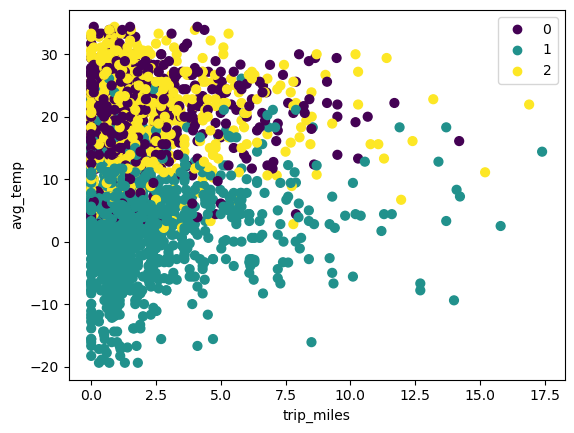


{0: 41843, 1: 44228, 2: 48054, 3: 40453}
   trip_miles   avg_temp  start_latitude  end_latitude  start_longitude  \
0    1.911613  20.354441       41.895710     41.897825       -87.636971   
1    1.845063   4.739662       41.895035     41.897763       -87.638115   
2    1.898601  19.711202       41.894421     41.896590       -87.636767   
3    1.812792   2.355475       41.895775     41.898299       -87.637681   

   end_longitude    dur_min  trip_total        xh        yh        xm  \
0     -87.640605  10.516014   10.912092 -0.287348 -0.093440 -0.433278   
1     -87.641464   9.480024   10.473407 -0.215914 -0.181137  0.481391   
2     -87.640107   9.978820   10.761631 -0.226717 -0.169128 -0.407612   
3     -87.641011   9.876533   10.531932 -0.276822 -0.121884  0.492102   

         ym        xw        yw        xd        yd        labels  
0 -0.480680 -0.305042 -0.693931  0.002997 -0.018411 -5.151435e-14  
1  0.421527  0.338834  0.454902  0.032958 -0.015189  1.000000e+00  
2 -0.469609 

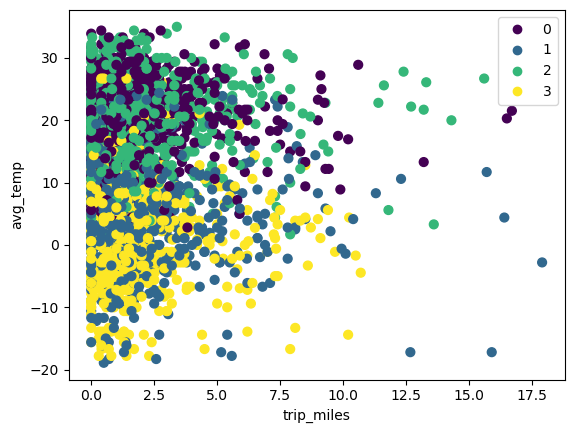


{0: 39089, 1: 27658, 2: 41843, 3: 25535, 4: 40453}
   trip_miles   avg_temp  start_latitude  end_latitude  start_longitude  \
0    1.818537   3.576769       41.894416     41.897058       -87.637605   
1    1.802386  19.503945       41.892871     41.894996       -87.635652   
2    1.911613  20.354441       41.895710     41.897825       -87.636971   
3    2.032531  18.693242       41.897170     41.899630       -87.639026   
4    1.812792   2.355475       41.895775     41.898299       -87.637681   

   end_longitude    dur_min  trip_total        xh        yh        xm  \
0     -87.640911   9.500535   10.391442 -0.222336 -0.228196  0.455502   
1     -87.638813  10.158085   10.566834 -0.264973 -0.243236 -0.367060   
2     -87.640605  10.516014   10.912092 -0.287348 -0.093440 -0.433278   
3     -87.642627   9.652732   11.039721 -0.173297 -0.019350 -0.232548   
4     -87.641011   9.876533   10.531932 -0.276822 -0.121884  0.492102   

         ym        xw        yw        xd        yd       

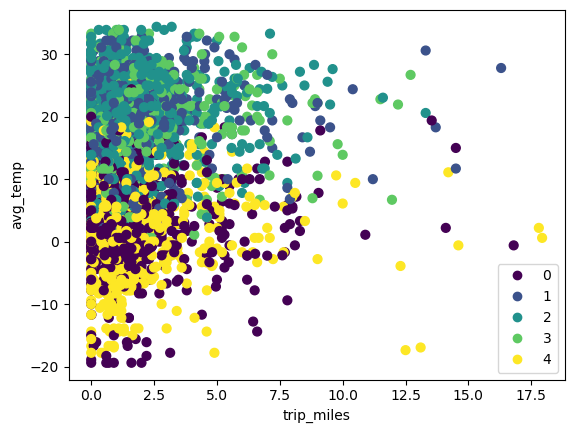

In [334]:
sub_data = work_data.loc[:,("trip_miles","start_latitude"
                ,"end_latitude","start_longitude",
                "end_longitude","dur_min","avg_temp",
                       "trip_total","xh","yh" ,"xm" ,"ym" ,"xw" ,
                       "yw","weekday","hour","month","day","xd","yd")]
sub_data_sample1 = sub_data.sample(200000)
sub_data_sample1 = sub_data_sample1[(np.abs(stats.zscore(sub_data_sample1)) < 3).all(axis=1)]
sub_data_sample = sub_data_sample1.loc[:,("trip_miles","avg_temp","start_latitude"
                ,"end_latitude","start_longitude",
                "end_longitude","dur_min",
                       "trip_total","xh","yh" ,"xm" ,"ym" ,"xw" ,
                       "yw","xd","yd")]
for i in range(2,6):
    centers,X2,X  = plot_kmeans(i, sub_data_sample, outlier=False)
    print()

In [346]:
sub_data = work_data.loc[:,("trip_miles","start_latitude"
                ,"end_latitude","start_longitude",
                "end_longitude","dur_min","avg_temp",
                       "trip_total","xh","yh" ,"xm" ,"ym" ,"xw" ,
                       "yw","weekday","hour","month","day","xd","yd")]
sub_data_sample1 = sub_data.sample(10000000)
#sub_data_sample1 = sub_data_sample1[(np.abs(stats.zscore(sub_data_sample1)) < 3).all(axis=1)]
sub_data_sample = sub_data_sample1.loc[:,("trip_miles","start_latitude"
                ,"end_latitude","start_longitude",
                "end_longitude","dur_min","avg_temp",
                       "trip_total","xh","yh" ,"xm" ,"ym" ,"xw" ,
                       "yw","xd","yd")]
for i in range(2,4):
    centers,X2,X  = plot_gmm(i, sub_data_sample, outlier=False)
    print()

ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
plot_with_X_labels_index2(sub_data_sample1,X,X2,15,1)